In [1]:
#import needed libraries
import re
import os
from lxml import etree
import pandas as pd
import pymc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')
sns.set_context('talk')
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
def get_wells_from_section(path):
    reads = path.xpath("*/Well")
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(float(s.text), r.attrib['Pos'])
         for r in reads
         for s in r]

    datalist = {
      well : value
      for (value, well) in data
    }
    
    welllist = [
                [
                 datalist[chr(64 + row) + str(col)]          
                 if chr(64 + row) + str(col) in datalist else None
                 for row in range(1,9)
                ]
                for col in range(1,13)
                ]
                
    return welllist

In [3]:
def file2df(file,columns):
    root = etree.parse(file)
    #Just going to work with topread for now
    TopRead = root.xpath("/*/Section")[0]
    welllist = get_wells_from_section(TopRead)
    df = pd.DataFrame(welllist, columns = columns)
    return df

In [4]:
SrcColumns = ['A - Src','B - Buffer','C - Src','D - Buffer', 'E - Src','F - Buffer','G - Src','H - Buffer']
AblColumns = ['A - Abl','B - Buffer','C - Abl','D - Buffer', 'E - Abl','F - Buffer','G - Abl','H - Buffer']

In [5]:
file_ABL_GEF= "data/Abl Gef gain 120 bw1020 2016-01-19 15-59-53_plate_1.xml"
file_ABL_GEF_IMA= "data/Abl Gef Ima gain 120 bw1020 2016-01-19 16-22-45_plate_1.xml"

In [6]:
AblGef_df = file2df(file_ABL_GEF,AblColumns)
AblGefIma_df = file2df(file_ABL_GEF_IMA,AblColumns)

In [7]:
AblGef_df

,A - Abl,B - Buffer,C - Abl,D - Buffer,E - Abl,F - Buffer,G - Abl,H - Buffer
0,62213,19784,62890,19797,62821,20594,63317,17635
1,62497,17332,62936,18205,62927,18102,63343,14681
2,63194,12950,63056,13223,62794,13049,63251,10586
3,63017,10782,62743,11030,62841,10622,63045,9235
4,56558,10186,62107,10257,61824,9884,55471,8785
5,34259,9837,38003,9884,38786,9620,35771,8796
6,22106,9861,24868,9716,24637,9757,23488,8789
7,14589,9659,16880,10010,17193,9518,17755,8612
8,11475,9601,12311,10035,13272,9758,12312,8625
9,10505,9669,11388,9891,11702,9649,10925,8513


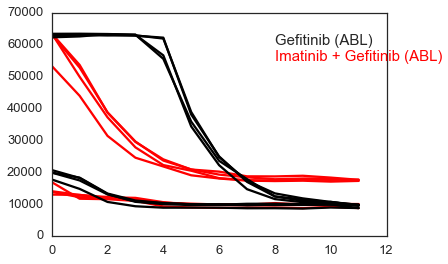

In [8]:
sns.set_palette("Paired", 10)

plt.plot(AblGefIma_df[:].values, 'r');
plt.plot(AblGef_df[:].values, 'k');
plt.text(8,60000,'Gefitinib (ABL)',fontsize=15)
plt.text(8,55000,'Imatinib + Gefitinib (ABL)',fontsize=15,color='red')
plt.savefig('Abl_Gef_Ima_Jan2016_repeat.png',dpi=1000)

In [9]:
ligand_conc = np.array([20.0e-6,9.15e-6,4.18e-6,1.91e-6,0.875e-6,0.4e-6,0.183e-6,0.0837e-6,0.0383e-6,0.0175e-6,0.008e-6,0.0001e-6], np.float64) # ligand concentration, M

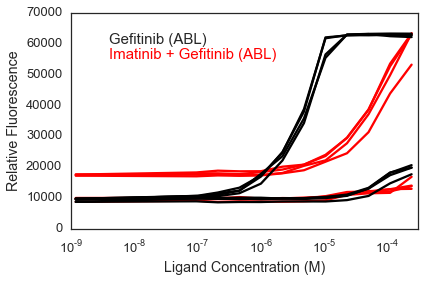

In [10]:
sns.set_palette("Paired", 10)

plt.semilogx(ligand_conc*12,AblGefIma_df[:].values, 'r');
plt.semilogx(ligand_conc*12,AblGef_df[:].values, 'k');
plt.text(4e-9,60000,'Gefitinib (ABL)',fontsize=15)
plt.text(4e-9,55000,'Imatinib + Gefitinib (ABL)',fontsize=15,color='red')
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.xlim(1e-9,3e-4)
plt.tight_layout();

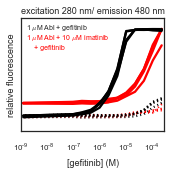

In [102]:
plt.figure(figsize=(2.5,2.5))

plt.semilogx(ligand_conc*12,AblGefIma_df[['A - Abl','C - Abl','E - Abl','G - Abl']].values, 'r');
plt.semilogx(ligand_conc*12,AblGefIma_df[['B - Buffer','D - Buffer','F - Buffer','H - Buffer']].values, 'r', linestyle=':');
plt.semilogx(ligand_conc*12,AblGef_df[['A - Abl','C - Abl','E - Abl','G - Abl']].values, 'k');
plt.semilogx(ligand_conc*12,AblGef_df[['B - Buffer','D - Buffer','F - Buffer','H - Buffer']].values, 'k', linestyle=':');
plt.text(1.5e-9,63000,'1 $\mu$M Abl + gefitinib',fontsize=7)
plt.text(1.5e-9,52000,'1 $\mu$M Abl + 10 $\mu$M imatinib \n    + gefitinib',fontsize=7, color='red')
plt.xlabel('[gefitinib] (M)',fontsize=9)
plt.ylabel('relative fluorescence',fontsize=9)
plt.title('excitation 280 nm/ emission 480 nm',fontsize=9)
plt.xlim(1e-9,3e-4)
plt.yticks([])
plt.xticks(fontsize=8)
plt.tight_layout();
plt.savefig('Abl_Gef_Ima_grant.eps',type='eps',dpi=1000)

In [78]:
AblGefIma_df[['A - Abl','C - Abl']]

,A - Abl,C - Abl
0,53250,63141
1,43872,52725
2,31303,38690
3,24462,29540
4,21709,23561
5,18941,20785
6,17939,19159
7,17258,18313
8,17135,17703
9,17250,17936


In [73]:
AblGefIma_df[:].values

array([[ 53250.,  12894.,  63141.,  13739.,  63400.,  13953.,  63432.,
         16807.],
       [ 43872.,  12797.,  52725.,  12068.,  53561.,  12777.,  49829.,
         11596.],
       [ 31303.,  11876.,  38690.,  12203.,  38596.,  12048.,  37127.,
         11445.],
       [ 24462.,  11368.,  29540.,  11254.,  29405.,  11867.,  27706.,
         10914.],
       [ 21709.,  10305.,  23561.,  10359.,  23947.,  10513.,  22149.,
          9179.],
       [ 18941.,   9813.,  20785.,  10048.,  20759.,   9671.,  20375.,
          8845.],
       [ 17939.,   9907.,  19159.,   9782.,  20094.,   9803.,  18045.,
          8713.],
       [ 17258.,   9639.,  18313.,   9788.,  18623.,   9717.,  17424.,
          8804.],
       [ 17135.,   9746.,  17703.,   9823.,  18595.,  10231.,  17284.,
          8846.],
       [ 17250.,   9698.,  17936.,  10016.,  18799.,   9771.,  17618.,
          8657.],
       [ 16964.,   9965.,  17938.,   9939.,  18223.,   9851.,  17518.,
          9041.],
       [ 17185.,   99